# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset

import matplotlib.pyplot as plt
import matplotlib.patches as pts

import os
import numpy as np

%matplotlib inline

In [2]:
dataset = get_dataset("data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_images(batch):
    '''
    This funtion takes a batch from the dataset and displays the 
    image with the corresponding bounding boxes.
    '''
    color_map = {1:'red', 2:'blue', 4:'green'}
    
    # plot image
    fig, ax = plt.subplots()
    im = batch['image'].numpy()
    ax.imshow(im)
    
    # add colored boundig boxes
    for xy_red, label in zip(batch['groundtruth_boxes'].numpy(), batch['groundtruth_classes'].numpy()):
        x1 = xy_red[1]*im.shape[1]
        x2 = xy_red[3]*im.shape[1]
        y1 = xy_red[0]*im.shape[0]
        y2 = xy_red[2]*im.shape[0]
        w = x2 - x1
        h = y2 - y1
        rec = pts.Rectangle((x1, y1), w, h, edgecolor=color_map[label], facecolor='none')
        ax.add_patch(rec)
        
    plt.axis('off')

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<Figure size 432x288 with 0 Axes>

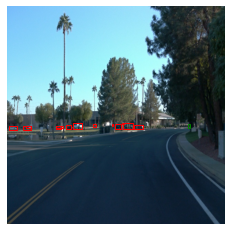

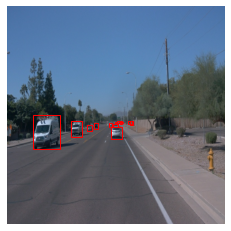

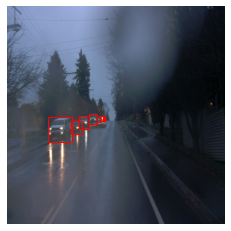

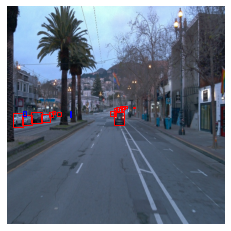

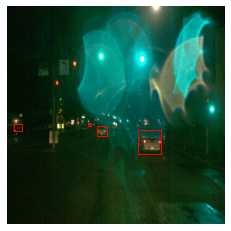

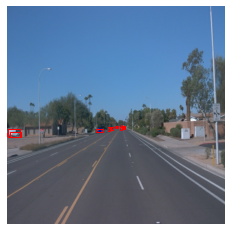

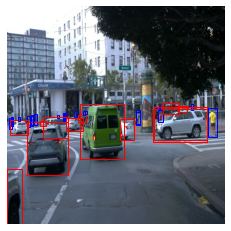

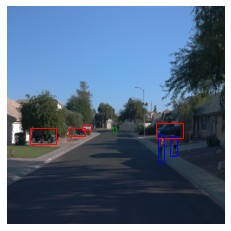

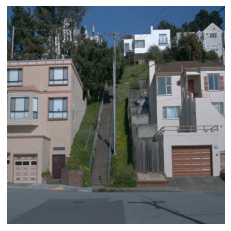

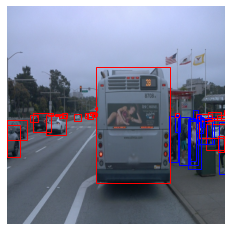

In [4]:
nbr_im = 10

plt.figure()
for i in range(nbr_im):
    for batch in dataset.shuffle(100).take(1):
        display_images(batch)
plt.show()
    

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

<Figure size 432x288 with 0 Axes>

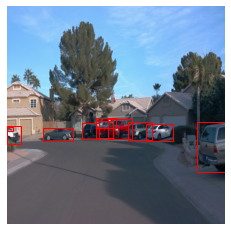

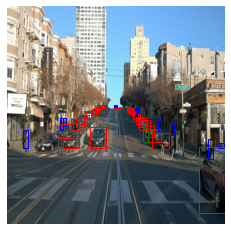

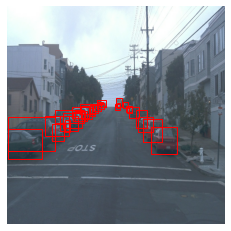

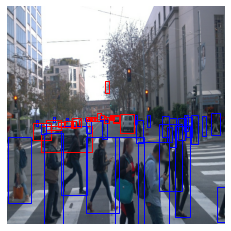

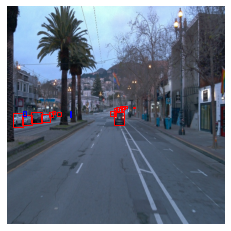

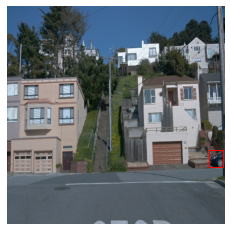

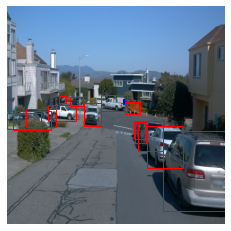

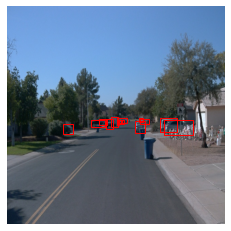

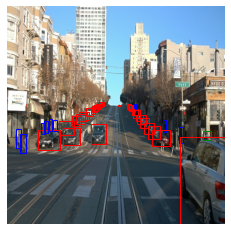

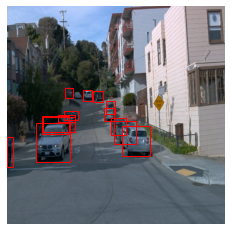

In [5]:
# Save 10 images for the project report with bounding boxes

nbr_im = 10
path = '/home/workspace/images'

if not os.path.exists(path):
    os.mkdir(path)

plt.figure()
for i in range(nbr_im):
    for batch in dataset.shuffle(100).take(1):
        display_images(batch)
        fname = "img" + str(i) + ".png"
        plt.savefig(os.path.join(path, fname))


### Average number of objects per image

[17.2846  4.8012  0.1246]


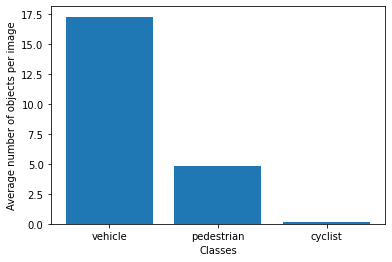

In [8]:
nbr_im = 10000
nbr_cl = {1:0, 2:0, 4:0}

for batches in dataset.shuffle(10000).take(nbr_im):
    for c in batches["groundtruth_classes"].numpy():
       nbr_cl[c] += 1
    
avg_nbr_cl = np.array(list(nbr_cl.values())) / nbr_im

# Plot average number of objects per image
x = ["vehicle", "pedestrian", "cyclist"]
y = avg_nbr_cl

fig = plt.figure()
plt.bar(x, y)
plt.xlabel("Classes")
plt.ylabel("Average number of objects per image")
plt.savefig(os.path.join(path, "avgNbrObjPerIm.png"))

print(avg_nbr_cl)

### Distribution of vehicles, pedestrians & cyclists

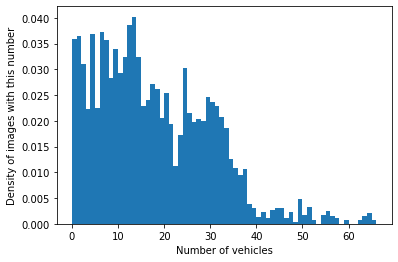

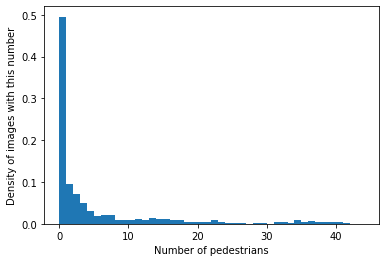

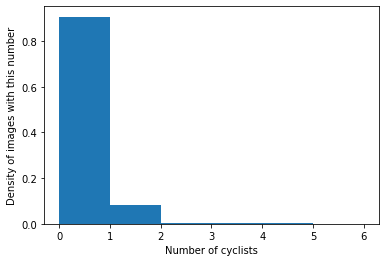

In [9]:
# Estimate number of images with given number of objects
nbr_im = 10000
count_vehicles = []
count_pedestrians = []
count_cyclists = []

for batches in dataset.shuffle(10000).take(nbr_im):
    nbr_cl_im = {1:0, 2:0, 4:0}
    for c in batches["groundtruth_classes"].numpy():
         nbr_cl_im[c] += 1
    count_vehicles.append(nbr_cl_im[1])
    count_pedestrians.append(nbr_cl_im[2])
    count_cyclists.append(nbr_cl_im[4])

    
# Plot distributions

def plot_distr(data, label):
    fig = plt.figure()
    binwidth = 1
    plt.hist(data, density=True, bins=range(min(data), max(data)+binwidth, binwidth))
    plt.xlabel("Number of "+label)
    plt.ylabel("Density of images with this number")
    plt.savefig(os.path.join(path, "distr_"+label+".png"))
    
plot_distr(count_vehicles, "vehicles")
plot_distr(count_pedestrians, "pedestrians")
plot_distr(count_cyclists, "cyclists")
